# Análisis de la integración económica de la población venezolana en el Perú en los años 2021 y 2022


Integrantes de grupo:
* Carlos Mariños
* Fabrizio Montalvo
* Paolo Salazar
* Cynthia Zhou

### I. PREPROCESAMIENTO DE LOS DATOS

In [ ]:
# Importamos las librerías necesarias para el análisis
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Cargamos el archivo CSV que contiene las características de la vivienda y del hogar
# Cargar archivos
# Características de la vivienda y del hogar
CVH = pd.read_csv("Características de la vivienda y del hogar.csv")
CVH.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P111A,P112_1,P112_2,P112_3,P112_4,P112_5,P112_6,P112_7,P112_8,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,242,11,...,,,,,,,,,,36.8443160934628
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,229,16,...,2,2.No,1.Sí,1.Sí,2.No,2.No,2.No,2.No,2.No,18.4221580467314
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,43,605,17,...,,1.Sí,1.Sí,1.Sí,2.No,1.Sí,2.No,1.Sí,2.No,12.2814386978209
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,46,543,12,...,,2.No,1.Sí,1.Sí,2.No,2.No,2.No,2.No,2.No,9.21107902336571
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,48,529,16,...,,1.Sí,2.No,1.Sí,1.Sí,1.Sí,2.No,1.Sí,2.No,12.2814386978209


In [ ]:
CVH.shape

(3769, 55)

In [ ]:
# Cargamos el archivo CSV que contiene las características de la vivienda y del hogar
# Características de los residentes del hogar
CRH = pd.read_csv("Características de los residentes del hogar.csv")
CRH.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P211_N,P211_1,P200_APORTANTE,P211_N_PARENTESCO,P211_N_SEXO,P211_N_AÑOS,P211_N_MESES,P211_N_ECIVIL,P211_N_MIGRANTE,factorfinal
0,15,LIMA,1,LIMA,19,LURIN,Lima,29806,68378,12,...,2,4.Otro,,2,2,29,,1,1,133.030686
1,15,LIMA,1,LIMA,19,LURIN,Lima,29778,68073,9,...,1,4.Otro,,1,2,35,,1,1,133.030686
2,7,LIMA,1,CALLAO,1,CALLAO,Lima,1814802,16137,9,...,1,4.Otro,,1,2,35,,6,1,133.030686
3,14,LAMBAYEQUE,1,CHICLAYO,6,LA VICTORIA,Chiclayo,3976,4564,9,...,1,4.Otro,,1,2,17,,6,1,18.043333
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,12284,10250,9,...,5,4.Otro,,11,2,17,,1,1,26.351641


In [ ]:
CRH.shape

(12487, 42)

In [ ]:
# Cargamos el archivo CSV que contiene las características de la vivienda y del hogar
# Empleo
Emp = pd.read_csv("Empleo.csv")
Emp.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4_2,P639_1,P639_1_1,P639_1_2,P639_1_3,P639_2,P639_2_1,P639_2_2,P639_2_3,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,3.Quincenal,1.¿0 – 100 soles?,2.No,,,,9.211079
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,4.Mensual,1.¿0 – 100 soles?,2.No,,,,9.211079
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,2.No,,,,2.No,,,,9.211079
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,,,,,9.211079
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,2.Semanal,2.¿101 – 200 soles?,1.Sí,1.Transferencias bancarias y/o agencia de envío,5.Bimestral,3.¿201 – a más soles?,18.422158


In [ ]:
Emp.shape

(10242, 128)

In [ ]:
# Cargamos el archivo CSV que contiene las características de la vivienda y del hogar
# Salud
SLD=pd.read_csv("Salud.csv")
SLD.head()

<ipython-input-9-73cb3b9f7f96>:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  SLD=pd.read_csv("Salud.csv")


,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P417_1_11,P417_1_12,P417_1_13,P417_2,P417_3,P417_4,P418,P418A,P200_N_CUIDADOR,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,2.No,2.No,2.No,,,,9.211079
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,1.Sí,2.No,2.No,2.No,,,9.211079
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,2.No,1.Sí,2.No,,,,9.211079
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,,,,,9.211079
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,,,1.Sí,2.No,2.No,2.No,,,18.422158


In [ ]:
SLD.shape

(11621, 116)

In [ ]:
# Reemplazar los espacios en nulo en la columna "P622_1" del dataframe Empleo, esta columna corresponde a Ingreso total en dinero
Emp["P622_1"] = Emp['P622_1'].replace(" ", pd.NA)
Emp['P622_1']=pd.to_numeric(Emp['P622_1'])
Emp['P622_1'].describe()

,P622_1
count,4203.000000
mean,511.032358
std,620.282042
min,0.000000
25%,200.000000
50%,330.000000
75%,600.000000
max,9500.000000


In [ ]:
# Ver las columnas en común en los dataframes Empleo y Salud
columnas = set(Emp.columns).intersection(SLD.columns)
columnas

{'CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal'}

In [ ]:
columnas=['CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal']

# Realizar el merge con las columnas en común obtenidas
df2 = pd.merge(SLD, Emp, on=columnas)
df2.shape

(10242, 225)

In [ ]:
# Repetir el proceso, ahora con el dataframe Características de los residentes del hogar
columnas2 = set(df2.columns).intersection(CRH.columns)
columnas2

{'CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal'}

In [ ]:
columnas2=['CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal']

# Realizar el merge
df_final = pd.merge(df2, CRH, on=columnas2)
df_final.shape

(10242, 248)

In [ ]:
# Reducir las filas a sólo las que no tienen vacío el la columna P622_1
df_final = df_final.dropna(subset=['P622_1'])
df_final.shape

(4203, 248)

In [ ]:
df_final['P622_1'].describe()

,P622_1
count,4203.000000
mean,511.032358
std,620.282042
min,0.000000
25%,200.000000
50%,330.000000
75%,600.000000
max,9500.000000


In [ ]:
# Reemplazar todos los vacíos en nulo
df_final = df_final.replace(" ", pd.NA)
# Eliminar las columnas con más del 70% de los datos vacíos
df_final.dropna(axis=1,inplace=True,thresh=int(df_final.shape[0]*0.7))
df_final.shape

(4203, 96)

In [ ]:
df_final.sample(5)

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4,P639_1,P639_2,INF_200,P203,P204,P205_A,P206,P207_1,P208
4837,15,LIMA,1,LIMA,12,INDEPENDENCIA,Lima,21311,24900,16,...,2.No,1.Sí,2.No,1,4.Yerno/nuera,2.Mujer,27,1.Conviviente,1.El Nº es,1.Sí
5618,15,LIMA,1,LIMA,11,EL AGUSTINO,Lima,24536,52473,2,...,2.No,1.Sí,2.No,2,11.Otro no pariente,1.Hombre,27,2.Casado/a,1.El Nº es,1.Sí
4832,15,LIMA,1,LIMA,12,INDEPENDENCIA,Lima,21311,24900,16,...,2.No,2.No,2.No,1,8.Otro pariente,1.Hombre,18,6.Soltero/a,1.El Nº es,1.Sí
5317,15,LIMA,1,LIMA,3,ATE,Lima,23559,58760,20,...,2.No,1.Sí,2.No,1,4.Yerno/nuera,2.Mujer,23,1.Conviviente,1.El Nº es,1.Sí
1974,13,LA LIBERTAD,1,TRUJILLO,1,TRUJILLO,Trujillo,10534,7204,10,...,2.No,2.No,2.No,1,7.Hermano/a,1.Hombre,22,1.Conviviente,3.No tiene,1.Sí


In [ ]:
# Contar nulos
df_final.isna().sum()

,0
CCDD,0
DEPARTAMENTO,0
CCPP,0
PROVINCIA,0
CCDI,0
...,...
P204,0
P205_A,0
P206,0
P207_1,4


In [ ]:
# Eliminar duplicados
df_final.drop_duplicates(inplace=True)
df_final.shape

(4203, 96)

In [ ]:
df_final.dtypes

,0
CCDD,int64
DEPARTAMENTO,object
CCPP,int64
PROVINCIA,object
CCDI,int64
...,...
P204,object
P205_A,object
P206,object
P207_1,object


In [ ]:
# Guardar una copia del dataframe final
df_original = df_final.copy()

# Función para convertir columnas a numéricas si es que la conversión genera más del 50% datos no nulos
def convertir_columna_a_numerica(columna):
    # Intentar convertir la columna a numérica
    convertir = pd.to_numeric(columna, errors='coerce')
    # Si la conversión deja más de la mitad de los valores como NaN, revertimos a la columna original
    if convertir.isna().sum() > len(columna) / 2:
        return columna  # Devolver la columna original si es mayoritariamente no numérica
    return convertir.fillna(columna)  # Devolver los valores originales en los NaNs

# Aplicar la conversión sólo a las columnas que pueden ser numéricas
df_convertida = df_original.apply(convertir_columna_a_numerica)
df_convertida.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4,P639_1,P639_2,INF_200,P203,P204,P205_A,P206,P207_1,P208
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,2.No,1.Sí,2.No,2,1.Jefe/a del hogar,1.Hombre,38,2.Casado/a,1.El Nº es,1.Sí
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,2.No,1.Sí,2.No,2,2.Esposo/a o compañero/a,2.Mujer,37,2.Casado/a,1.El Nº es,1.Sí
24,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,236,7,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,26,1.Conviviente,1.El Nº es,1.Sí
25,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,237,8,...,2.No,1.Sí,2.No,2,1.Jefe/a del hogar,1.Hombre,26,1.Conviviente,1.El Nº es,1.Sí
27,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,238,9,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,42,5.Separado o Ex conviviente,1.El Nº es,1.Sí


In [ ]:
# Encoding para las variables categóricas
df_cat = df_convertida.select_dtypes('object')
df_cat.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CIUDAD,ESTRATO,VRESFIN,RESFIN,P15,P401_1,P401_2,...,P638_2,P638_3,P638_4,P639_1,P639_2,P203,P204,P206,P207_1,P208
0,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,1.ESSALUD?,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,1.Hombre,2.Casado/a,1.El Nº es,1.Sí
1,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,1.ESSALUD?,0.0,...,2.No,2.No,2.No,1.Sí,2.No,2.Esposo/a o compañero/a,2.Mujer,2.Casado/a,1.El Nº es,1.Sí
24,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,0.0,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,2.Mujer,1.Conviviente,1.El Nº es,1.Sí
25,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,0.0,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,1.Hombre,1.Conviviente,1.El Nº es,1.Sí
27,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,0.0,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,2.Mujer,5.Separado o Ex conviviente,1.El Nº es,1.Sí


In [ ]:
for i in df_cat.columns:
    le = LabelEncoder()
    #Pasar las variables a string
    df_cat[i] = df_cat[i].astype(str)
    df_cat[i] = le.fit_transform(df_cat[i])
    df_convertida[i] = df_cat[i]
df_convertida.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4,P639_1,P639_2,INF_200,P203,P204,P205_A,P206,P207_1,P208
0,24,7,1,8,1,57,7,34,240,21,...,1,0,1,2,0,0,38,1,0,0
1,24,7,1,8,1,57,7,34,240,21,...,1,0,1,2,3,1,37,1,0,0
24,24,7,1,8,1,57,7,38,236,7,...,1,0,1,1,0,1,26,0,0,0
25,24,7,1,8,1,57,7,38,237,8,...,1,0,1,2,0,0,26,0,0,0
27,24,7,1,8,1,57,7,38,238,9,...,1,0,1,1,0,1,42,4,0,0


In [ ]:
# Crear la nueva columna basada en la lógica indicada
def classify_row(row):
    if row['P401_5'] == 1:
        return 0
    elif row['P401_1'] == 1:
        return 1
    elif row['P401_2'] == 1:
        return 2
    elif row['P401_3'] == 1:
        return 3
    elif row['P401_4'] == 1:
        return 4
    else:
        return None  # Caso donde no haya una clasificación clara

df_convertida['P401_C'] = df_convertida.apply(classify_row, axis=1)

# Mostrar los primeros resultados de la nueva columna
df_convertida[['P401_1', 'P401_2', 'P401_3', 'P401_4', 'P401_5', 'P401_C']].head()
df_convertida.drop(columns=['P401_1', 'P401_2', 'P401_3', 'P401_4', 'P401_5'], inplace=True)

In [ ]:
df_convertida.columns

Index(['CCDD', 'DEPARTAMENTO', 'CCPP', 'PROVINCIA', 'CCDI', 'DISTRITO',
       'CIUDAD', 'CONGLOMERADO', 'NSELV', 'VIVIENDA', 'THOGAR', 'NHOGAR',
       'ESTRATO', 'VRESFIN', 'RESFIN', 'P15', 'P15_N', 'P200_N', 'INF_400',
       'P402', 'P405_1', 'P405_2', 'P405_3', 'P405_4', 'P405_5', 'P405_6',
       'P405_7', 'P408_1', 'P408_2', 'P408_3', 'P408_4', 'P408_5', 'P408_6',
       'P410_A', 'P410_B', 'P410', 'P417_1', 'P417_2', 'P417_3', 'P417_4',
       'factorfinal', 'INF_600', 'P601', 'P602', 'P609_COD', 'P611_COD',
       'P612', 'P613', 'P614', 'P614_T', 'P615_1', 'P615_2', 'P615_3',
       'P615_4', 'P615_5', 'P615_6', 'P615_7', 'P615_8', 'P615_9', 'P615_10',
       'P615_11', 'P615_12', 'P615_13', 'P615_14', 'P615_T', 'P616', 'P617',
       'P619', 'P620', 'P621', 'P622_1', 'P622_2', 'P624_3', 'P624_4', 'P625',
       'P635', 'P636', 'P637_COD', 'P638_1', 'P638_2', 'P638_3', 'P638_4',
       'P639_1', 'P639_2', 'INF_200', 'P203', 'P204', 'P205_A', 'P206',
       'P207_1', 'P208', '

In [ ]:
# Mapeo de los nombres actuales de las columnas con nombres más descriptivos según el diccionario de datos
mapear_columnas = {
    'CCDD': 'Código departamento',
    'DEPARTAMENTO': 'Nombre departamento',
    'CCPP': 'Código provincia',
    'PROVINCIA': 'Nombre provincia',
    'CCDI': 'Código distrito',
    'DISTRITO': 'Nombre distrito',
    'CIUDAD': 'Ciudad de estudio',
    'CONGLOMERADO': 'Conglomerado',
    'NSELV': 'Número de selección vivienda',
    'VIVIENDA': 'Número vivienda',
    'THOGAR': 'Tipo de hogar',
    'NHOGAR': 'Número de orden del hogar',
    'ESTRATO': 'Estrato socioeconómico',
    'VRESFIN': 'Resultado encuesta vivienda',
    'RESFIN': 'Resultado encuesta hogar',
    'P15': 'Persona llegada de Venezuela',
    'P15_N': 'Número de personas llegadas de Venezuela',
    'P200_N': 'Número de orden de residente',
    'INF_400': 'Información adicional seguro',
    'P401_C': 'Seguro',
    'P402': 'Enfermedad o malestar crónico',
    'P405_1': 'Síntoma reciente (tos, fiebre, etc.)',
    'P405_2': 'Enfermedad reciente (gripe, colitis, etc.)',
    'P405_3': 'Recaída enfermedad crónica',
    'P405_4': 'Accidente reciente',
    'P405_5': 'Problema mental o emocional reciente',
    'P405_6': 'Embarazo reciente',
    'P405_7': 'No tuvo síntomas recientes',
    'P408_1': 'Limitación permanente para moverse',
    'P408_2': 'Limitación permanente para ver',
    'P408_3': 'Limitación permanente para comunicarse',
    'P408_4': 'Limitación permanente para oír',
    'P408_5': 'Limitación permanente para aprender',
    'P408_6': 'Limitación permanente para relacionarse',
    'P410_A': 'Vacunado contra COVID-19',
    'P410_B': 'Número de dosis COVID-19',
    'P410': 'Tuvo COVID-19',
    'P417_1': 'Acceso a métodos anticonceptivos',
    'P417_2': 'Acceso a prueba de VIH',
    'P417_3': 'Acceso a consejería de salud sexual',
    'P417_4': 'Acceso a otros servicios de salud reproductiva',
    'factorfinal': 'Factor de expansión',
    'INF_600': 'Información adicional de acceso',
    'P601': 'Tuvo trabajo la semana pasada',
    'P602': 'Pago o ganancia en dinero/especie',
    'P609_COD': 'Código de ocupacion',
    'P611_COD': 'Código de giro de la empresa',
    'P612': 'Posicion en la jerarquia de la empresa',
    'P613': 'Tiene contrato laboral',
    'P614': 'Rango de personas que trabajan con usted',
    'P614_T': 'N_companheros de trabajo',
    'P615_1': 'Ocupación principal domingo',
    'P615_2': 'Ocupación principal lunes',
    'P615_3': 'Ocupación principal martes',
    'P615_4': 'Ocupación principal miércoles',
    'P615_5': 'Ocupación principal jueves',
    'P615_6': 'Ocupación principal viernes',
    'P615_7': 'Ocupación principal sábado',
    'P615_8': 'Ocupación secundaria domingo',
    'P615_9': 'Ocupación secundaria lunes',
    'P615_10': 'Ocupación secundaria martes',
    'P615_11': 'Ocupación secundaria miércoles',
    'P615_12': 'Ocupación secundaria jueves',
    'P615_13': 'Ocupación secundaria viernes',
    'P615_14': 'Ocupación secundaria sábado',
    'P615_T': 'Total horas trabajadas semana',
    'P616': 'Trabaja normalmente esas horas',
    'P617': 'Quería trabajar mas',
    'P619': 'Busco trabajo la semana pasada',
    'P620': 'Trabajos adicionales en última semana',
    'P621': 'Frecuencia de pago',
    'P622_1': 'Ingreso en dinero',
    'P622_2': 'Ingreso en especie',
    'P624_3': 'Sin remuneracion',
    'P624_4': 'Sin otra actividad',
    'P625': 'Lugar de trabajo cerca',
    'P635': 'No le pagaron',
    'P636': 'Tenia trabajo en venezela',
    'P638_1': 'Pension',
    'P638_2': 'Frecuencia Pension',
    'P638_3': 'Ingresos financieros',
    'P638_4': 'Otros ingresos',
    'P639_1': 'Envio de dinero a venezuela',
    'P639_2': 'Envio de dinero a otros paises',
    'INF_200': 'Información adicional gastos',
    'P203': 'Parentesco con jefe de hogar',
    'P204': 'Sexo',
    'P205_A': 'Edad',
    'P206': 'Estado civil',
    'P207_1': 'Número de celular',
    'P208': 'Migración desde Venezuela'
}



# Renombrar las columnas del DataFrame
df_convertida = df_convertida.rename(columns=mapear_columnas)
df_convertida.head()

len(mapear_columnas)

91

### Análisis de los datos

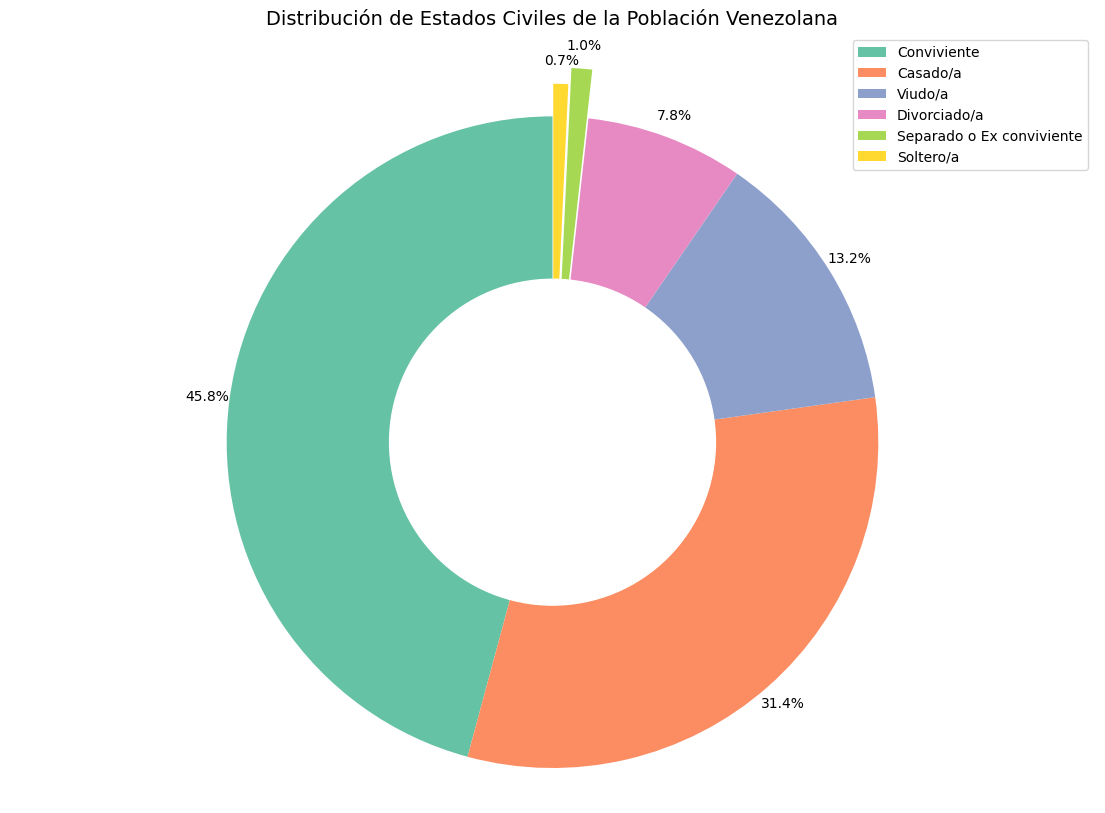

In [ ]:
# Ajustamos el gráfico de pastel siguiendo las reglas de diseño "Evergreen"
# Se utilizarán colores suaves y neutros, evitando la sobrecarga visual

sizes = df_convertida['Estado civil'].value_counts()
plt.figure(figsize=(14, 10))

# Crear gráfico de pastel con una paleta de colores más sobria
plt.pie(
    sizes,
    textprops={'fontsize': 10},
    labels=['Conviviente', 'Casado/a', 'Viudo/a', 'Divorciado/a', 'Separado o Ex conviviente', 'Soltero/a'],
    pctdistance=1.07,
    labeldistance=None,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0, 0, 0, 0.15, 0.1],
    colors=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F'],

)

# Añadir un círculo blanco en el centro para crear el efecto "donut"
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustamos las proporciones del gráfico
plt.axis('equal')

# Añadimos una leyenda clara y un título discreto
plt.legend()
plt.title('Distribución de Estados Civiles de la Población Venezolana', fontsize=14)
plt.show()


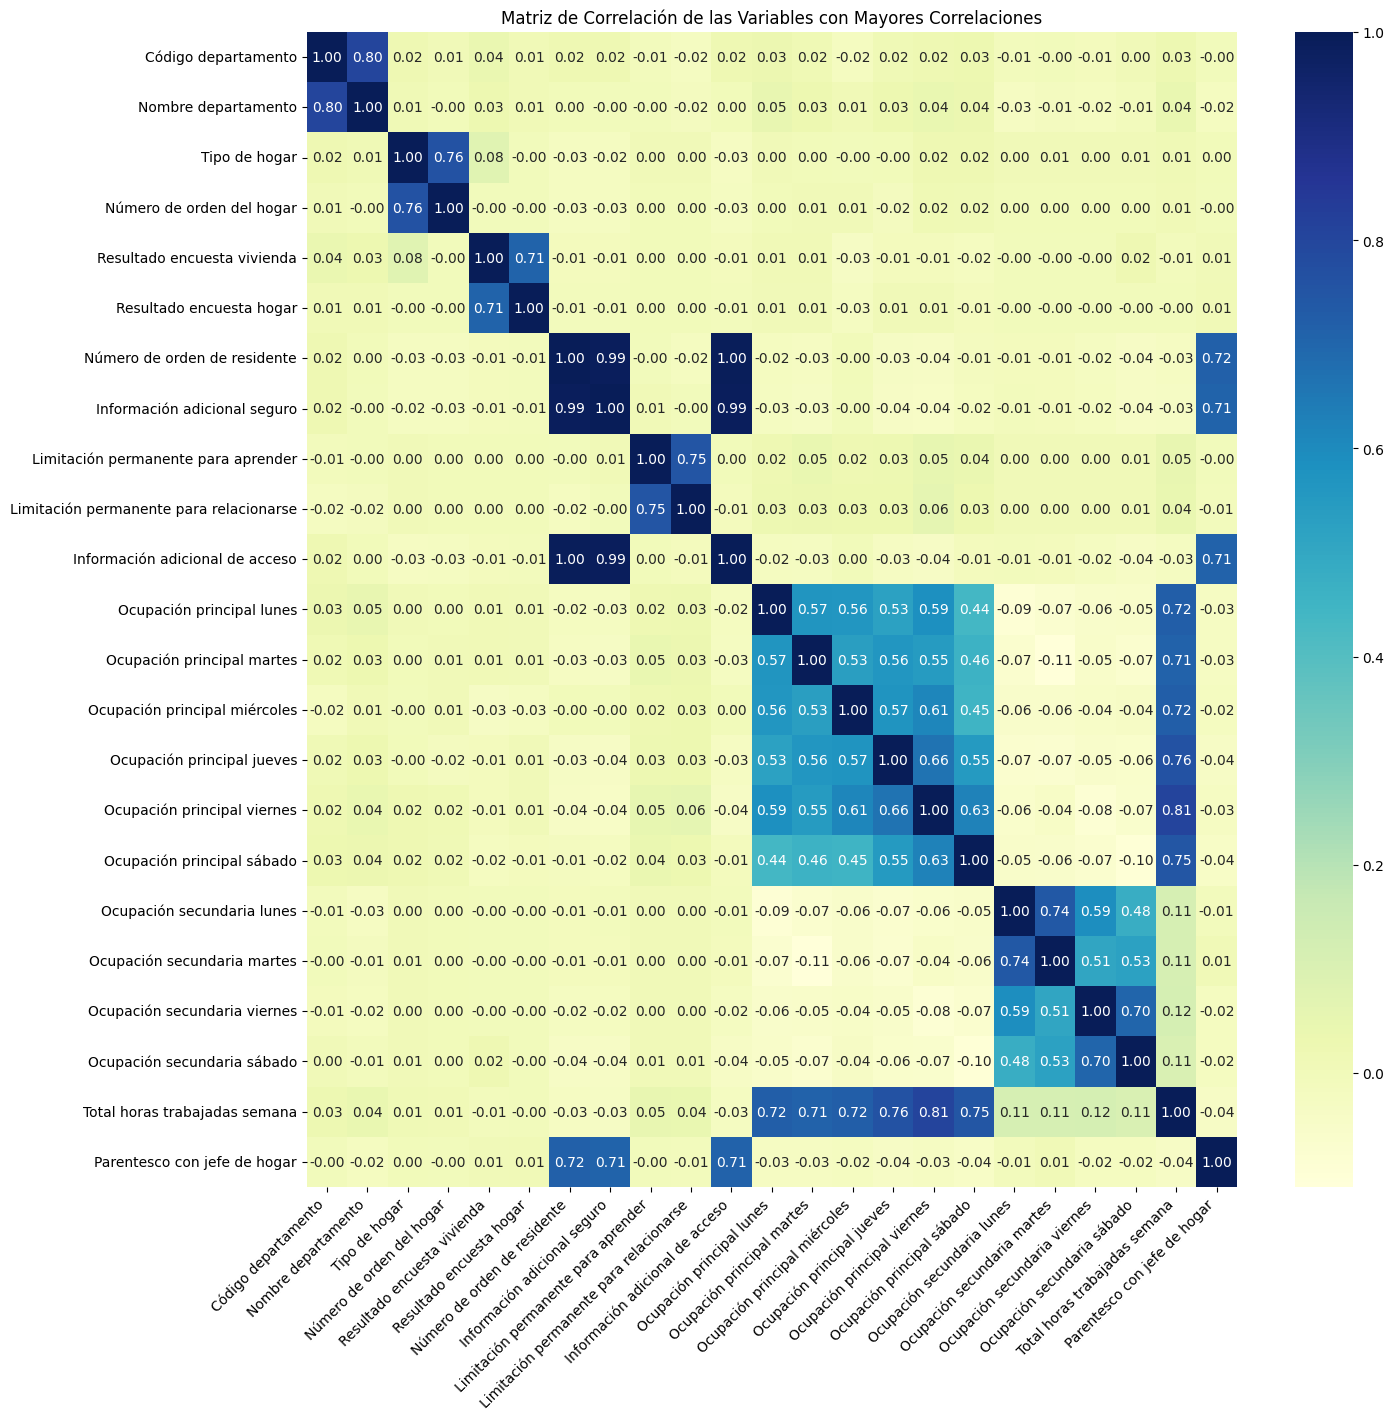

In [ ]:
# Realizamos una visualización de los datos usando seaborn
# Primero, vamos a calcular la matriz de correlación completa para todas las variables numéricas
full_correlation_matrix = df_convertida.corr()

# Filtramos las correlaciones más altas (en valor absoluto) que no sean 1, ya que 1 es la autocorrelación
high_correlation_threshold = 0.7
high_correlations = full_correlation_matrix[(full_correlation_matrix.abs() > high_correlation_threshold) & (full_correlation_matrix.abs() != 1)]

# Filtramos las columnas y filas que tienen al menos una correlación alta
high_correlation_columns = high_correlations.dropna(how='all', axis=1).columns

# Creamos una matriz de correlación con solo estas columnas
filtered_correlation_matrix = df_convertida[high_correlation_columns].corr()

# Graficamos la nueva matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Matriz de Correlación de las Variables con Mayores Correlaciones')
plt.xticks(rotation=45, ha='right')
plt.show()


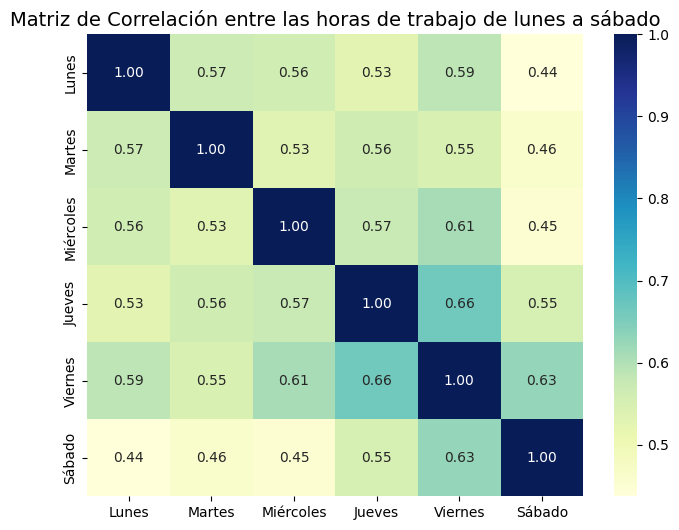

In [ ]:
# Realizamos una visualización de los datos usando seaborn
# Seleccionamos las columnas P615_2 hasta P615_7
columns_p615 = ['Ocupación principal lunes', 'Ocupación principal martes', 'Ocupación principal miércoles', 'Ocupación principal jueves', 'Ocupación principal viernes', 'Ocupación principal sábado']

# Calcular la matriz de correlación para estas columnas
correlation_matrix_p615 = df_convertida[columns_p615].corr()


# Definir los nuevos labels para los días de la semana
days_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

# Graficar la matriz de correlación con los labels actualizados
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_p615, annot=True, cmap='YlGnBu', fmt=".2f", xticklabels=days_labels, yticklabels=days_labels)
plt.title('Matriz de Correlación entre las horas de trabajo de lunes a sábado', fontsize=14)
plt.show()




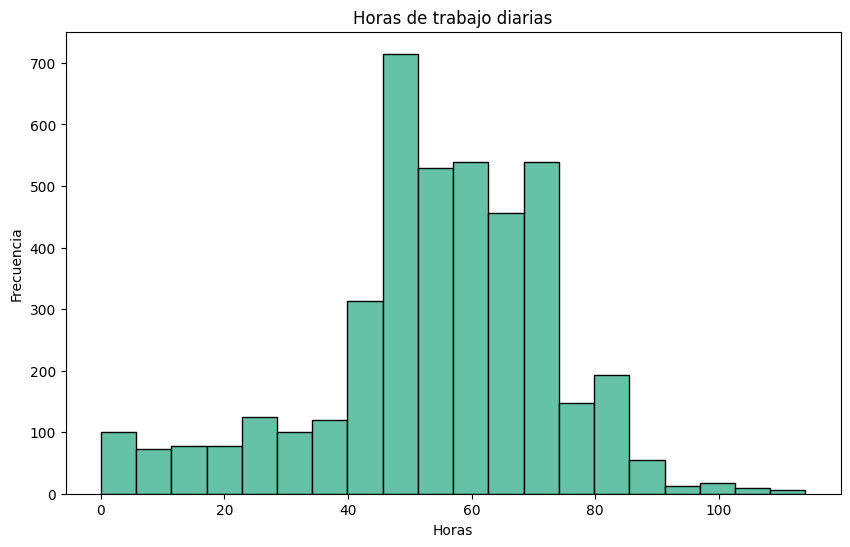

In [ ]:
# Vamos a crear un histograma para la variable P615_T

plt.figure(figsize=(10, 6))
plt.hist(df_convertida['Total horas trabajadas semana'].dropna(), bins=20, color='#66C2A5', edgecolor='black')
plt.title('Horas de trabajo diarias')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()


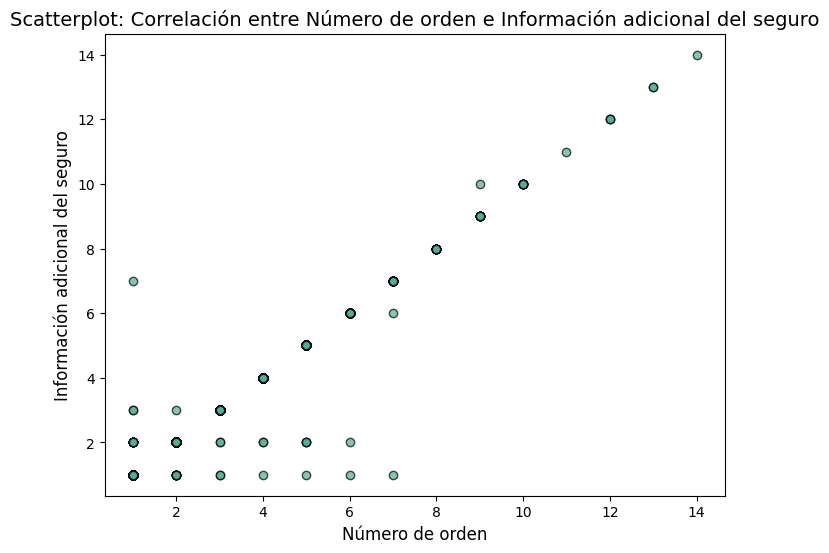

In [ ]:
# Crear scatterplot entre P200_N e INF_400 desde la base renombrada df_convertida con colores neutros.
plt.figure(figsize=(8, 6))
plt.scatter(df_convertida['Número de orden de residente'], df_convertida['Información adicional seguro'], c='#5A9', edgecolor='k', alpha=0.7)
plt.title('Scatterplot: Correlación entre Número de orden e Información adicional del seguro', fontsize=14)
plt.xlabel('Número de orden', fontsize=12)
plt.ylabel('Información adicional del seguro', fontsize=12)

plt.show()

#se explica pensando en como se convierten las variables categoricas a numeros, (van en orden)

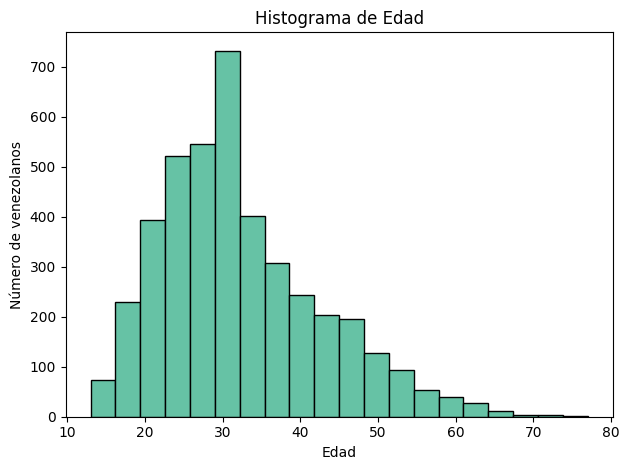

In [ ]:
plt.hist(df_convertida["Edad"].dropna(), bins=20, color='#66C2A5', edgecolor='black')
plt.title(f'Histograma de Edad')
plt.xlabel("Edad")
plt.ylabel('Número de venezolanos')

# Mostrar los histogramas
plt.tight_layout()
plt.show()


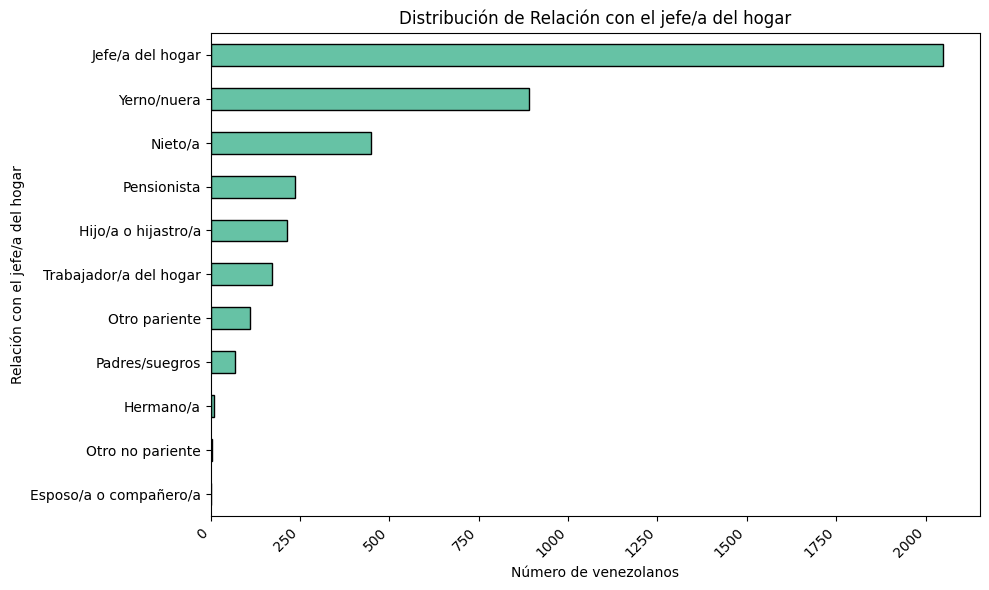

In [ ]:
# Actualizar el mapeo para que los valores vayan del 0 al 10
p203_labels_corrected = {
    0: 'Jefe/a del hogar',
    1: 'Esposo/a o compañero/a',
    2: 'Hijo/a o hijastro/a',
    3: 'Yerno/nuera',
    4: 'Nieto/a',
    5: 'Padres/suegros',
    6: 'Hermano/a',
    7: 'Otro pariente',
    8: 'Trabajador/a del hogar',
    9: 'Pensionista',
    10: 'Otro no pariente'
}


# Ahora vamos a graficar la distribución de P203 con las etiquetas corregidas
plt.figure(figsize=(10, 6))
df_convertida['Parentesco con jefe de hogar'].map(p203_labels_corrected).value_counts().sort_values(ascending=True).plot(kind='barh', color='#66C2A5', edgecolor='black')
plt.title('Distribución de Relación con el jefe/a del hogar')
plt.ylabel('Relación con el jefe/a del hogar')
plt.xlabel('Número de venezolanos')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
df_original['CIUDAD'].dropna().sort_values(ascending=True).value_counts()

,count
CIUDAD,
Lima,2354
Trujillo,468
Chimbote,309
Arequipa,257
Ica,216
Piura,209
Tumbes,198
Chiclayo,192


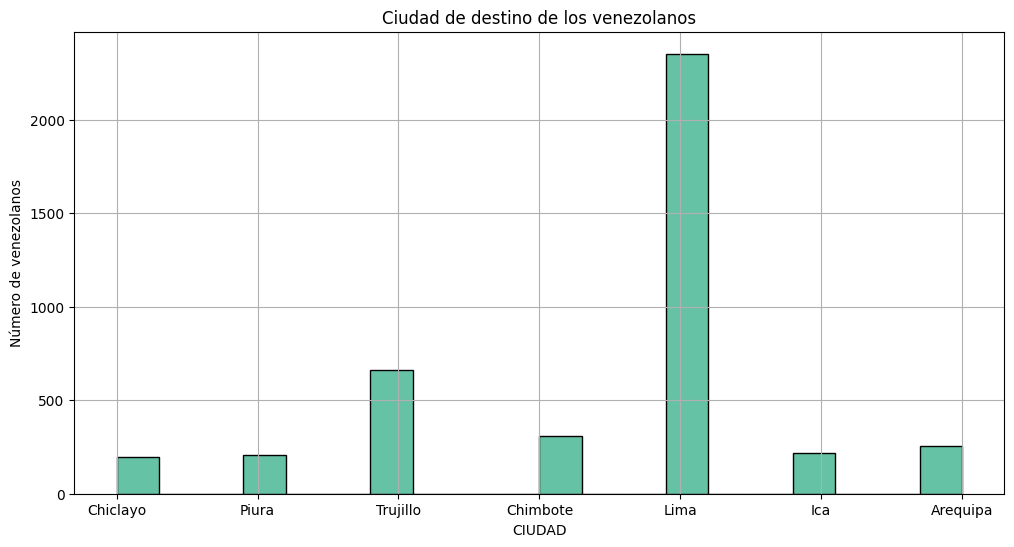

In [ ]:
# Creamos histogramas solo para las variables CIUDAD y P611_COD
CIUDAD_LABELS = {
    0: 'Arequipa',
    1: 'Trujillo',
    2: 'Chimbote',
    3: 'Ica',
    4: 'Lima',
    5: 'Piura',
    6: 'Trujillo',
    7: 'Chiclayo',

}
plt.figure(figsize=(12, 6))

# Histograma para CIUDAD
plt.hist(df_convertida['Ciudad de estudio'].map(CIUDAD_LABELS), bins=20, color='#66C2A5', edgecolor='black')
plt.title('Ciudad de destino de los venezolanos')
plt.xlabel('CIUDAD')
plt.ylabel('Número de venezolanos')
plt.grid()

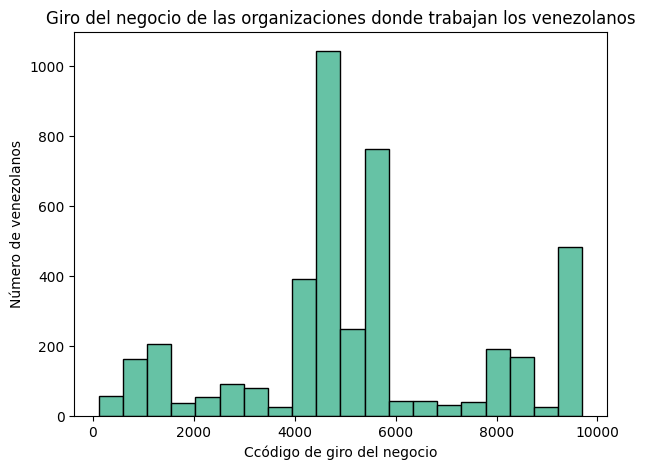

In [ ]:
# Histograma para P611_COD

plt.hist(df_convertida['Código de giro de la empresa'].dropna(), bins=20, color='#66C2A5', edgecolor='black')
plt.title('Giro del negocio de las organizaciones donde trabajan los venezolanos')
plt.xlabel('Ccódigo de giro del negocio')
plt.ylabel('Número de venezolanos')
plt.tight_layout()
plt.show()

PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#estandarizamos los datos
scaler = StandardScaler()
data_standarized = scaler.fit_transform(df_convertida)

#hacemos pca con los datos estandarizados
pca = PCA(n_components= 50)
pca.fit(data_standarized)

PCA(n_components=50)

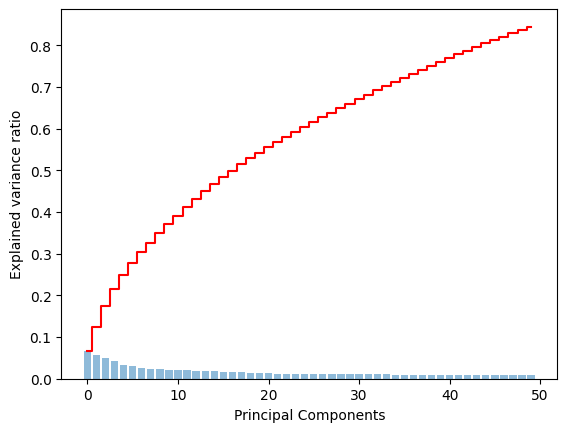

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(0,len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

# **NMF**

In [ ]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

#escalamos la data
scaler = MinMaxScaler()
V = scaler.fit_transform(df_convertida)

# Definir el modelo NMF
model = NMF(n_components=7, init='random', random_state=0) # n_components: número de componentes a "reducir"

# Ajustar el modelo
W = model.fit_transform(V)
H = model.components_
# Ver las matrices resultantes
print("W:") # matriz 𝐖 de factores -->representación (menor dimensión de 𝐕)
print(W)
print("\nH:")
print(H) # matriz 𝐇 de características o "componentes"-->coeficientes

# Reconstrucción de la matriz V
V_approx = np.dot(W, H) # V_approx: es una reconstrucción aproximada de V usando W y H.
print("\nReconstrucción de V:")
print(V_approx)

W:
[[0.59816729 0.612105   0.         ... 0.08778569 0.01177664 0.42569415]
 [0.10396997 0.30764179 0.         ... 0.63576316 0.00984028 0.44444319]
 [0.63260261 0.28698205 0.         ... 0.0858739  0.         0.38666646]
 ...
 [0.56758443 0.59020237 0.27730602 ... 0.06412097 0.03925243 0.        ]
 [0.33016382 0.31236136 0.         ... 0.01618689 0.37304535 0.67751615]
 [0.27803117 0.41039242 0.         ... 0.         0.33302851 0.6659849 ]]

H:
[[5.19796433e-01 5.67449049e-01 7.63219599e-02 7.01791483e-01
  0.00000000e+00 4.40871430e-01 7.25169401e-01 3.07915685e-02
  1.92051319e-02 2.20820991e-01 2.11347802e-02 4.83651440e-03
  5.82122264e-01 5.39079403e-04 0.00000000e+00 0.00000000e+00
  2.89231200e-01 6.64880560e-02 6.64890042e-02 1.27711129e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.72797477e+00 1.14074722e+00
  1.13455092e+00 1.13684957e+00 1.13206860e+00 1.13338343e+00
  1.13313414e+00 9.42683384e-02 4.96182971e-01 7.9439

In [ ]:
model.reconstruction_err_

109.34619971657791

In [ ]:
df_convertida.columns

Index(['Código departamento', 'Nombre departamento', 'Código provincia',
       'Nombre provincia', 'Código distrito', 'Nombre distrito',
       'Ciudad de estudio', 'Conglomerado', 'Número de selección vivienda',
       'Número vivienda', 'Tipo de hogar', 'Número de orden del hogar',
       'Estrato socioeconómico', 'Resultado encuesta vivienda',
       'Resultado encuesta hogar', 'Persona llegada de Venezuela',
       'Número de personas llegadas de Venezuela',
       'Número de orden de residente', 'Información adicional seguro',
       'Enfermedad o malestar crónico', 'Síntoma reciente (tos, fiebre, etc.)',
       'Enfermedad reciente (gripe, colitis, etc.)',
       'Recaída enfermedad crónica', 'Accidente reciente',
       'Problema mental o emocional reciente', 'Embarazo reciente',
       'No tuvo síntomas recientes', 'Limitación permanente para moverse',
       'Limitación permanente para ver',
       'Limitación permanente para comunicarse',
       'Limitación permanente para o

In [ ]:
df_convertida.head()

,Código departamento,Nombre departamento,Código provincia,Nombre provincia,Código distrito,Nombre distrito,Ciudad de estudio,Conglomerado,Número de selección vivienda,Número vivienda,...,Envio de dinero a venezuela,Envio de dinero a otros paises,Información adicional gastos,Parentesco con jefe de hogar,Sexo,Edad,Estado civil,Número de celular,Migración desde Venezuela,Seguro
0,24,7,1,8,1,57,7,34,240,21,...,0,1,2,0,0,38,1,0,0,1
1,24,7,1,8,1,57,7,34,240,21,...,0,1,2,3,1,37,1,0,0,1
24,24,7,1,8,1,57,7,38,236,7,...,0,1,1,0,1,26,0,0,0,0
25,24,7,1,8,1,57,7,38,237,8,...,0,1,2,0,0,26,0,0,0,0
27,24,7,1,8,1,57,7,38,238,9,...,0,1,1,0,1,42,4,0,0,0


In [ ]:
empleo1 = pd.read_csv('Empleo.csv')
empleo1.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4_2,P639_1,P639_1_1,P639_1_2,P639_1_3,P639_2,P639_2_1,P639_2_2,P639_2_3,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,3.Quincenal,1.¿0 – 100 soles?,2.No,,,,9.211079
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,4.Mensual,1.¿0 – 100 soles?,2.No,,,,9.211079
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,2.No,,,,2.No,,,,9.211079
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,,,,,9.211079
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,2.Semanal,2.¿101 – 200 soles?,1.Sí,1.Transferencias bancarias y/o agencia de envío,5.Bimestral,3.¿201 – a más soles?,18.422158


In [ ]:
educacion1 = pd.read_csv('Educación.csv')
educacion1.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P509_7,P509_8,P510,P511,P512,P513,P514,P515,P516,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,1.Sí,2.No,3.No tengo dinero,3.Moreno,1.Heterosexual,9.211079
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,1.Sí,2.No,3.No tengo dinero,5.Mestizo,1.Heterosexual,9.211079
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,1.¿Aprobado?,,,,,3.Moreno,1.Heterosexual,9.211079
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,8.NO TUVO DIFICULTADES,1.¿Aprobado?,,,,,,,9.211079
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,,,,,,,5.Mestizo,1.Heterosexual,18.422158


In [ ]:
columnas = set(empleo1.columns).intersection(educacion1.columns)
columnas


{'CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal'}

In [ ]:
junto = pd.merge(empleo1, educacion1, on=list(columnas), how='inner')
junto.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P509_6,P509_7,P509_8,P510,P511,P512,P513,P514,P515,P516
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,1.Sí,2.No,3.No tengo dinero,3.Moreno,1.Heterosexual
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,1.Sí,2.No,3.No tengo dinero,5.Mestizo,1.Heterosexual
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,1.¿Aprobado?,,,,,3.Moreno,1.Heterosexual
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,8.NO TUVO DIFICULTADES,1.¿Aprobado?,,,,,,
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,,,,,,,,5.Mestizo,1.Heterosexual


In [ ]:
junto.shape

(10242, 164)

In [ ]:
junto.isnull().sum().loc[junto.isnull().sum()>0]/len(junto)

,0


In [ ]:
empleo1.shape

(10242, 128)

In [ ]:
educacion1.shape

(10739, 55)

In [ ]:
# Reemplazar todos los vacíos en nulo
junto = junto.replace(" ", pd.NA)
# Eliminar las columnas con más del 70% de los datos vacíos
junto = junto.dropna(thresh=int(0.7*len(junto)), axis=1)
junto.shape

(10242, 36)

In [ ]:
a = junto.isnull().sum().loc[junto.isnull().sum()>0]/len(junto)
subset= list(a.loc[a<0.05].index)

In [ ]:
#Eliminar los registros nulos de las columnas que tienen menos del 5% nulos
junto = junto.dropna(subset=subset)
junto.shape

(10227, 36)

In [ ]:
junto.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P639_1,P639_2,factorfinal,INF_500,P501A,P501,P503,P505,P515,P516
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,1.Sí,2.No,9.211079,1,1.VENEZUELA,10.Superior Universitaria Completa,2.No,2.No,3.Moreno,1.Heterosexual
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,1.Sí,2.No,9.211079,2,1.VENEZUELA,10.Superior Universitaria Completa,2.No,2.No,5.Mestizo,1.Heterosexual
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,2.No,2.No,9.211079,3,2.PERU,<NA>,1.Sí,1.Sí,3.Moreno,1.Heterosexual
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,<NA>,<NA>,9.211079,2,2.PERU,<NA>,1.Sí,1.Sí,<NA>,<NA>
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,1.Sí,1.Sí,18.422158,1,1.VENEZUELA,3.Educación Básica Incompleta,2.No,2.No,5.Mestizo,1.Heterosexual


In [ ]:
junto.columns

Index(['CCDD', 'DEPARTAMENTO', 'CCPP', 'PROVINCIA', 'CCDI', 'DISTRITO',
       'CIUDAD', 'CONGLOMERADO', 'NSELV', 'VIVIENDA', 'THOGAR', 'NHOGAR',
       'ESTRATO', 'VRESFIN', 'RESFIN', 'P15', 'P15_N', 'P200_N', 'INF_600',
       'P601', 'P635', 'P636', 'P638_1', 'P638_2', 'P638_3', 'P638_4',
       'P639_1', 'P639_2', 'factorfinal', 'INF_500', 'P501A', 'P501', 'P503',
       'P505', 'P515', 'P516'],
      dtype='object')

In [ ]:
#Borrar columnas repetidas o de identificación
subset_drop = ["CCDD","CCPP","PROVINCIA","CCDI","DISTRITO","CIUDAD","CONGLOMERADO","NSELV","VIVIENDA","NHOGAR","VRESFIN","RESFIN","P15","P200_N","INF_600","factorfinal",
               "INF_500"]
junto = junto.drop(columns=subset_drop)


In [ ]:
for col in junto.columns:
    junto[col]=np.where(junto[col].isnull(), junto[col].mode()[0], junto[col])

In [ ]:
junto.isnull().sum().sum()

0

In [ ]:
subset_label_encoder = ["ESTRATO","P601","P636","P638_1","P638_2","P638_3","P638_4","P639_1","P639_2","P501","P503","P505"]
subset_one_hot_encoding=["DEPARTAMENTO","THOGAR","P635","P501A","P515","P516"]

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in subset_label_encoder:
    le = LabelEncoder()
    junto[col] = le.fit_transform(junto[col])
for col in subset_one_hot_encoding:
    ohe = OneHotEncoder(sparse_output=False)
    encoded_data = ohe.fit_transform(junto[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=[f"{col}_{category}" for category in ohe.categories_[0]])
    junto = pd.concat([junto, encoded_df], axis=1)
    junto = junto.drop(columns=[col])
junto.head()

,ESTRATO,P15_N,P601,P636,P638_1,P638_2,P638_3,P638_4,P639_1,P639_2,...,P515_nan,P516_1.Heterosexual,P516_2.Gay,P516_3.Lesbiana,P516_4.Bisexual,P516_5.Pansexual,P516_6.Asexual,P516_7.Otro,P516_8.NO SABE,P516_nan
0,1.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
junto.P516_nan.loc[junto.P516_nan == 1].sum()

15.0

In [ ]:
junto.columns

Index(['ESTRATO', 'P15_N', 'P601', 'P636', 'P638_1', 'P638_2', 'P638_3',
       'P638_4', 'P639_1', 'P639_2', 'P501', 'P503', 'P505',
       'DEPARTAMENTO_ANCASH', 'DEPARTAMENTO_AREQUIPA', 'DEPARTAMENTO_ICA',
       'DEPARTAMENTO_LA LIBERTAD', 'DEPARTAMENTO_LAMBAYEQUE',
       'DEPARTAMENTO_LIMA', 'DEPARTAMENTO_PIURA', 'DEPARTAMENTO_TUMBES',
       'THOGAR_1.0', 'THOGAR_2.0', 'THOGAR_3.0', 'THOGAR_nan',
       'P635_1.Sí, recibió menos de lo establecido',
       'P635_2.Sí, no recibió pago alguno', 'P635_3.No', 'P635_4.No sabe',
       'P635_5.PREFIERE NO RESPONDER', 'P635_nan', 'P501A_1.VENEZUELA',
       'P501A_2.PERU', 'P501A_3.Sin nivel educativo', 'P501A_nan',
       'P515_1.Negro/a', 'P515_2.Afrodescendientes', 'P515_3.Moreno',
       'P515_4.Blanco', 'P515_5.Mestizo', 'P515_6.Otro', 'P515_7.NO SABE',
       'P515_nan', 'P516_1.Heterosexual', 'P516_2.Gay', 'P516_3.Lesbiana',
       'P516_4.Bisexual', 'P516_5.Pansexual', 'P516_6.Asexual', 'P516_7.Otro',
       'P516_8.NO SABE', 'P

In [ ]:
#dropear las lineas donde los nan son 1
junto.drop(junto[junto.P516_nan == 1].index, inplace=True)
junto.drop(junto[junto.P501A_nan == 1].index, inplace=True)
junto.drop(junto[junto.P515_nan == 1].index, inplace=True)
junto.drop(columns=["P516_nan","P501A_nan","P515_nan"], inplace=True)
junto.shape

(10227, 49)

In [ ]:
junto.isna().sum()

,0
ESTRATO,15
P15_N,15
P601,15
P636,15
P638_1,15
P638_2,15
P638_3,15
P638_4,15
P639_1,15
P639_2,15


In [ ]:
#borrar na
junto.dropna(inplace=True,axis=0)
junto.shape

(10212, 49)

In [ ]:
junto_preprocesado = junto.copy()

In [ ]:
#estandarizamos los datos numericos para pca
scaler = StandardScaler()
junto_preprocesado["P15_N"]= scaler.fit_transform(junto_preprocesado[["P15_N"]])
junto_preprocesado.head()

,ESTRATO,P15_N,P601,P636,P638_1,P638_2,P638_3,P638_4,P639_1,P639_2,...,P515_6.Otro,P515_7.NO SABE,P516_1.Heterosexual,P516_2.Gay,P516_3.Lesbiana,P516_4.Bisexual,P516_5.Pansexual,P516_6.Asexual,P516_7.Otro,P516_8.NO SABE
0,1.0,-0.031188,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.031188,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.031188,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-0.031188,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,-0.031188,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#pca
pca = PCA(n_components=15)
fit_pca = pca.fit(junto_preprocesado)


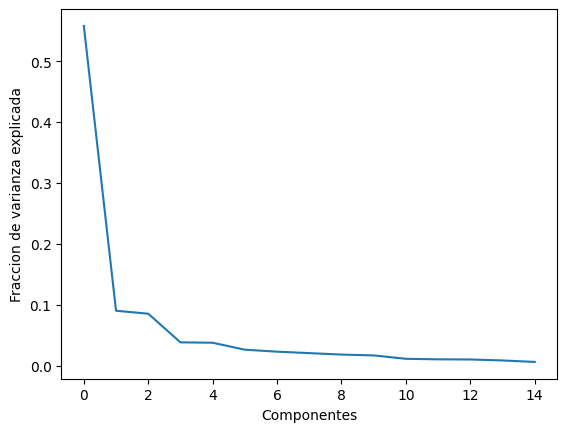

In [ ]:
plt.plot( pca.explained_variance_ratio_ )
plt.xlabel('Componentes')
plt.ylabel('Fraccion de varianza explicada')
plt.show()

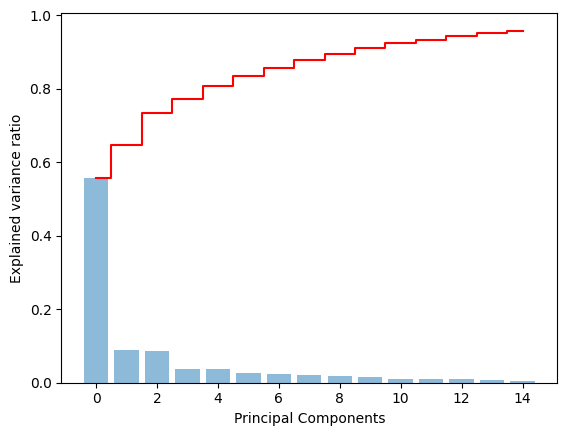

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.bar(range(0,len(fit_pca.explained_variance_ratio_)), fit_pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(0,len(fit_pca.explained_variance_ratio_)), np.cumsum(fit_pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [ ]:
#En porcentaje
print(pca.explained_variance_ratio_[0:5]*100)

[55.78846308  9.00430741  8.51672368  3.81334418  3.74917911]


In [ ]:
#pca con 3 componentes
pca = PCA(n_components=5)
fit_pca = pca.fit(junto_preprocesado)
print((pca.explained_variance_ratio_[0:5]*100).sum())


80.8720174606391


In [ ]:
junto_pca = pd.DataFrame(fit_pca.transform(junto_preprocesado), columns=["PC1","PC2","PC3","PC4","PC5"])
junto_pca.head()


,PC1,PC2,PC3,PC4,PC5
0,-5.055750,-0.415211,-0.623709,-0.291914,0.314306
1,-5.058922,-0.412492,-0.608652,-0.529059,0.032040
2,0.988729,0.092041,-0.801229,1.739830,-0.098662
3,0.988617,0.047737,-0.801358,1.839140,-0.158840
4,-2.050355,-0.084934,0.287594,-0.919331,-0.190628


In [ ]:
#Vemos las variables con mayor carga en valor absoluto en el primer componente
loadings_pc1= pd.DataFrame(fit_pca.components_[0].T, columns=["PC1"], index=junto_preprocesado.columns)
loadings_pc1["PC1"].abs().sort_values(ascending=False).head(5)

,PC1
P501,0.999497
P505,0.018133
P503,0.015474
P636,0.015255
DEPARTAMENTO_LIMA,0.007103


In [ ]:
#vemos las variables con mayor carga en el segundo componente
loadings_pc2= pd.DataFrame(fit_pca.components_[1].T, columns=["PC2"], index=junto_preprocesado.columns)
loadings_pc2.abs().sort_values("PC2", ascending=False).head(5)

,PC2
P15_N,0.900343
ESTRATO,0.370717
P601,0.143540
P636,0.126807
P505,0.075042


In [ ]:
#vemos las variables con mayor carga en el tercer componente
loadings_pc3= pd.DataFrame(fit_pca.components_[2].T, columns=["PC3"], index=junto_preprocesado.columns)
loadings_pc3.abs().sort_values("PC3", ascending=False).head(5)

,PC3
ESTRATO,0.924455
P15_N,0.360725
DEPARTAMENTO_LIMA,0.090662
P636,0.039200
P601,0.035488


In [ ]:
#vemos las variables con mayor carga en el cuarto componente
loadings_pc4=pd.DataFrame(fit_pca.components_[3].T, columns=["PC4"], index=junto_preprocesado.columns)
loadings_pc4.abs().sort_values("PC4", ascending=False).head(5)

,PC4
P515_3.Moreno,0.414756
P636,0.394201
P601,0.374052
P501A_1.VENEZUELA,0.298780
P505,0.298091


In [ ]:
#vemos las variables con mayor carga en el quinto componente
loadings_pc5=pd.DataFrame(fit_pca.components_[4].T, columns=["PC5"], index=junto_preprocesado.columns)
loadings_pc5.abs().sort_values("PC5", ascending=False).head(5)

,PC5
P515_3.Moreno,0.448112
P636,0.411411
P601,0.387407
P505,0.307832
P515_4.Blanco,0.282334


NMF

In [ ]:
junto_preprocesado2=junto.copy()

In [ ]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

#escalamos la data
scaler = MinMaxScaler()
junto_preprocesado2['P15_N'] = scaler.fit_transform(junto_preprocesado[['P15_N']])
junto_preprocesado2.head()

,ESTRATO,P15_N,P601,P636,P638_1,P638_2,P638_3,P638_4,P639_1,P639_2,...,P515_6.Otro,P515_7.NO SABE,P516_1.Heterosexual,P516_2.Gay,P516_3.Lesbiana,P516_4.Bisexual,P516_5.Pansexual,P516_6.Asexual,P516_7.Otro,P516_8.NO SABE
0,1.0,0.214286,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.214286,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.214286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.214286,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.214286,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

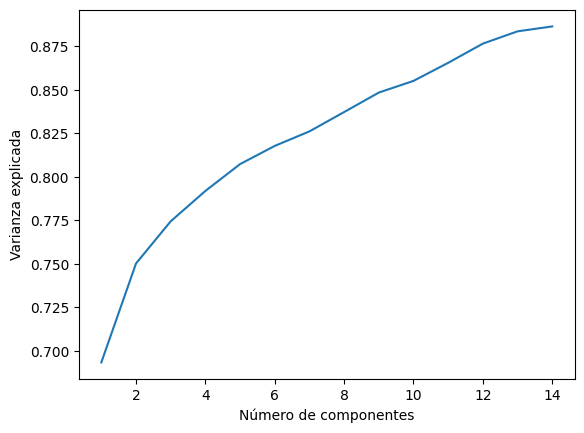

In [ ]:
#hallamos el numero optimo de componentes para nmf
from numpy import linalg as LA
componentes=[i for i in range(1,15)]
error=[]
for i in componentes:
    nmf = NMF(n_components=i, init='random', random_state=0)
    nmf.fit(junto_preprocesado2)
    error.append(1-nmf.reconstruction_err_/LA.norm(junto_preprocesado2))
plt.plot(componentes, error)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

In [ ]:
#hacemos nmf
nmf = NMF(n_components=5, init='random', random_state=0)
nmf.fit(junto_preprocesado2)
H=nmf.components_
junto_nmf= pd.DataFrame(nmf.transform(junto_preprocesado2), columns=["C1","C2","C3","C4","C5"])
junto_nmf.head()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,C1,C2,C3,C4,C5
0,0.040302,0.228798,1.236490,0.148095,0.016060
1,0.054053,0.108360,1.765390,0.147344,0.031802
2,0.450242,0.256536,0.000000,0.148334,0.282361
3,0.452435,0.240198,0.000000,0.148700,0.280249
4,0.273201,0.000000,1.910276,0.297680,0.000000


In [ ]:
#vemos las variables con mayor carga en el primer componente
loadings_pc1= pd.DataFrame(H[0].T, columns=["C1"], index=junto_preprocesado2.columns)
loadings_pc1["C1"].abs().sort_values(ascending=False).head(5)

,C1
P501,14.520562
P638_1,0.216836
P638_2,0.210346
P638_3,0.207152
P638_4,0.196324


In [ ]:
loadings_pc2= pd.DataFrame(H[1].T, columns=["C2"], index=junto_preprocesado2.columns)
loadings_pc2.abs().sort_values("C2", ascending=False).head(5)

,C2
P515_3.Moreno,2.579997
P635_3.No,2.011927
P503,1.978674
P505,1.918058
P501,1.764710


In [ ]:
loadings_pc3= pd.DataFrame(H[2].T, columns=["C3"], index=junto_preprocesado2.columns)
loadings_pc3.abs().sort_values("C3", ascending=False).head(5)

,C3
P501A_1.VENEZUELA,0.495953
P503,0.479348
P505,0.473025
THOGAR_1.0,0.391104
P638_2,0.388108


In [ ]:
loadings_pc4=pd.DataFrame(H[3].T, columns=["C4"], index=junto_preprocesado2.columns)
loadings_pc4.abs().sort_values("C4", ascending=False).head(5)

,C4
ESTRATO,6.650765
DEPARTAMENTO_LIMA,0.367117
P638_1,0.075486
P638_3,0.072928
P638_2,0.070290


In [ ]:
loadings_pc5=pd.DataFrame(H[4].T, columns=["C5"], index=junto_preprocesado2.columns)
loadings_pc5.abs().sort_values("C5", ascending=False).head(5)

,C5
P636,3.588494
P601,3.527875
P639_2,1.609503
P638_4,1.525905
P638_2,1.515899


**TSNE**

In [ ]:
#hacemos tsne con 3 componentes
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
original_distances=pairwise_distances(junto_preprocesado2)

TSNE=TSNE(n_components=3,random_state=0)
fit_tsne=TSNE.fit_transform(junto_preprocesado2)
fit_tsne=pd.DataFrame(fit_tsne, columns=["C1","C2","C3"])
fit_tsne.head()

,C1,C2,C3
0,-28.481953,2.484501,-6.556389
1,-27.682709,-9.112455,6.215332
2,-9.040959,6.756703,25.914492
3,-7.799202,8.079671,25.102070
4,-0.244836,-5.668989,-10.147668


**COMPARACIÓN DE DISTANCIAS**

In [ ]:
from sklearn.metrics import pairwise_distances

original_distances=pairwise_distances(junto_preprocesado2)
#comparamos la correlación de distancias de cada uno de los métodos
pca_distances=pairwise_distances(junto_pca)
nmf_distances=pairwise_distances(junto_nmf)

corr_pca=np.corrcoef(original_distances,pca_distances)
corr_nmf=np.corrcoef(original_distances,nmf_distances)

print('Correlación de distancias PCA:', corr_pca[0,1])
print('Correlación de distancias NMF:', corr_nmf[0,1])

Correlación de distancias PCA: 0.9942120665632406
Correlación de distancias NMF: 0.9942120665632406


**KMEANS CON PCA**

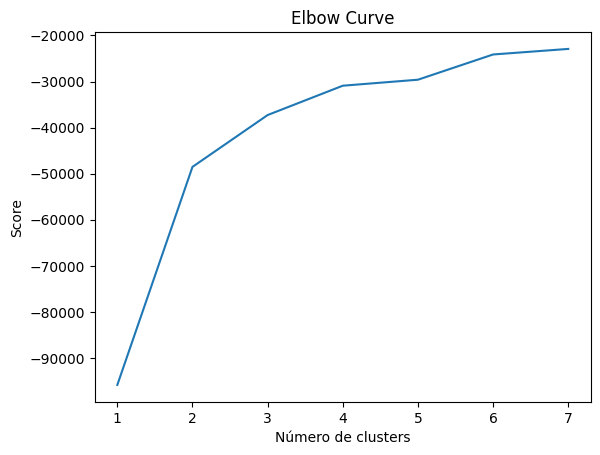

In [ ]:
from sklearn.cluster import KMeans

Nc=range(1,8)
kmeans=[KMeans(n_clusters=i,n_init='auto') for i in Nc]
score=[kmeans[i].fit(junto_pca).score(junto_pca) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
Kmeans1=KMeans(n_clusters=3, init='k-means++')
Kmeans1.fit(junto_pca)
labels=Kmeans1.labels_
centroides=Kmeans1.cluster_centers_
labels=pd.DataFrame(labels,columns=['cluster'])
centroides=pd.DataFrame(centroides,columns=junto_pca.columns)
centroides

,PC1,PC2,PC3,PC4,PC5
0,0.554471,0.129432,0.017587,0.086797,-0.092515
1,-3.951670,-0.050887,-0.032092,-0.024475,0.026319
2,3.333948,-0.385160,-0.018727,-0.271168,0.288722


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
graph= pd.concat([junto_pca,labels],axis=1)
figure=px.scatter_3d(graph,x='PC1',y='PC2',z='PC3',color='cluster',symbol='cluster',width=700,height=500)
centroid_fig=px.scatter_3d(centroides,x='PC1',y='PC2',z='PC3',color_discrete_sequence=['black'],symbol_sequence=['circle'],width=700,height=500)
figure.add_trace(centroid_fig.data[0])
figure.show()

**KMEANS CON NMF**

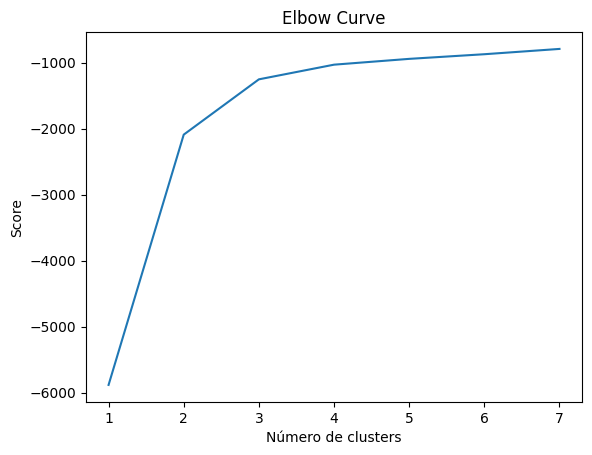

In [ ]:
score=[kmeans[i].fit(junto_nmf).score(junto_nmf) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
KMeans2=KMeans(n_clusters=3, init='k-means++')
Kmeans2=KMeans2.fit(junto_nmf)
labels=Kmeans2.labels_
centroides=Kmeans2.cluster_centers_
labels=pd.DataFrame(labels,columns=['cluster'])
centroides=pd.DataFrame(centroides,columns=junto_nmf.columns)
centroides

,C1,C2,C3,C4,C5
0,0.394800,0.051187,1.823699,0.254381,0.071729
1,0.379459,0.347419,0.106903,0.258646,0.171784
2,0.395322,0.220325,0.894786,0.257505,0.123859


In [ ]:
graph= pd.concat([junto_nmf,labels],axis=1)
figure=px.scatter_3d(graph,x='C1',y='C2',z='C3',color='cluster',symbol='cluster',width=700,height=500)
centroid_fig=px.scatter_3d(centroides,x='C1',y='C2',z='C3',color_discrete_sequence=['black'],symbol_sequence=['circle'],width=700,height=500)
figure.add_trace(centroid_fig.data[0])
figure.show()


**DBSCAN PARA PCA**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#buscamos los parametros optimos para dbscan
from sklearn.metrics import silhouette_score,davies_bouldin_score
eps_values=np.linspace(0.1,1.0,10)
min_samples_values=range(2,10)
best_params={}
best_silouette=-1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan=DBSCAN(eps=eps,min_samples=min_samples)
        dbscan.fit(junto_pca)
        if len(set(dbscan.labels_))>1:
            silouette=silhouette_score(junto_pca,dbscan.labels_)
            if silouette>best_silouette:
                best_silouette=silouette
                best_params={'eps': eps, 'min_samples': min_samples}
print(best_params)
print(best_silouette)

{'eps': 1.0, 'min_samples': 6}
0.4329949318060921


In [ ]:
dbscan=DBSCAN(eps=1.0,min_samples=6)
dbscan.fit(junto_pca)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    # Convert the pandas DataFrame to a NumPy array for numpy-style indexing
    X_np = X.to_numpy()

    anomalies = X_np[anomalies_mask]
    non_cores = X_np[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
graph= pd.concat([junto_pca,pd.DataFrame(dbscan.labels_,columns=['Labels'])],axis=1)
figure=px.scatter_3d(graph,x='PC1',y='PC2',z='PC3',color='Labels',symbol='Labels',width=700)
figure.show()

**DBSCAN PARA NMF**

In [ ]:
#buscamos los parametros optimos para dbscan
from sklearn.metrics import silhouette_score,davies_bouldin_score
eps_values=np.linspace(0.1,1.0,10)
min_samples_values=range(2,10)
best_params={}
best_silouette=-1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan=DBSCAN(eps=eps,min_samples=min_samples)
        dbscan.fit(junto_nmf)
        if len(set(dbscan.labels_))>1:
            silouette=silhouette_score(junto_nmf,dbscan.labels_)
            if silouette>best_silouette:
                best_silouette=silouette
                best_params={'eps': eps, 'min_samples': min_samples}
print(best_params)
print(best_silouette)

{'eps': 0.2, 'min_samples': 6}
0.021708504652413287


In [ ]:
DBSCAN2=DBSCAN(eps=0.15, min_samples=6)
DBSCAN2.fit(junto_nmf)
np.unique(DBSCAN2.labels_)

array([-1,  0,  1])

In [ ]:
graph= pd.concat([junto_nmf,pd.DataFrame(DBSCAN2.labels_,columns=['Labels'])],axis=1)
figure=px.scatter_3d(graph,x='C1',y='C2',z='C3',color='Labels',symbol='Labels',width=700)
figure.show()